**Importing Dependencies**

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


**Initializing Image size**

In [0]:
IMAGE_SIZE = [224, 224]

**Adding Dataset to our Colab environment**

In [0]:
pip install -U -q kaggle

In [0]:
mkdir -p ~/.kaggle

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanket2311","key":"fec67a80222cdb149171509a204117a2"}'}

In [9]:
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 1.15G/1.15G [00:19<00:00, 64.5MB/s]
100% 1.15G/1.15G [00:19<00:00, 63.3MB/s]


In [10]:
pwd

'/content'

**Unzipping the dataset**

In [11]:
!unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray.zip          


In [12]:
ls

chest-xray-pneumonia.zip  chest_xray.zip  kaggle.json  sample_data/


In [13]:
!unzip chest_xray.zip

Archive:  chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUM

In [0]:
ls

 chest_xray/                chest_xray.zip          kaggle.json   sample_data/
 chest-xray-pneumonia.zip  'E:\ML_PY\kaggle.json'   __MACOSX/


**Initializing Training and test dataset path**

In [0]:
train_path = '/content/chest_xray/train'
valid_path = '/content/chest_xray/test'

In [15]:
pwd

'/content'

**Downloading Weights for transfer learning from VGG16**

In [16]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 3s 0us/step


In [0]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  


In [0]:
  # useful for getting number of classes
folders = glob('/content/chest_xray/train/*')
  


**Now, Let's add our own layer at the end of the model**

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [0]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [21]:
# view the structure of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Specifying the image path to the model.**

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**Fitting tha model with dataset**

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
163/163 [==============================] - 138s 849ms/step - loss: 0.1701 - acc: 0.9331 - val_loss: 0.2465 - val_acc: 0.9103
Epoch 2/5
163/163 [==============================] - 130s 795ms/step - loss: 0.1101 - acc: 0.9576 - val_loss: 0.3653 - val_acc: 0.8942
Epoch 3/5
163/163 [==============================] - 130s 799ms/step - loss: 0.1052 - acc: 0.9615 - val_loss: 0.3285 - val_acc: 0.9103
Epoch 4/5
163/163 [==============================] - 130s 799ms/step - loss: 0.1146 - acc: 0.9590 - val_loss: 0.6228 - val_acc: 0.8574
Epoch 5/5
163/163 [==============================] - 129s 794ms/step - loss: 0.0874 - acc: 0.9676 - val_loss: 0.3047 - val_acc: 0.9151


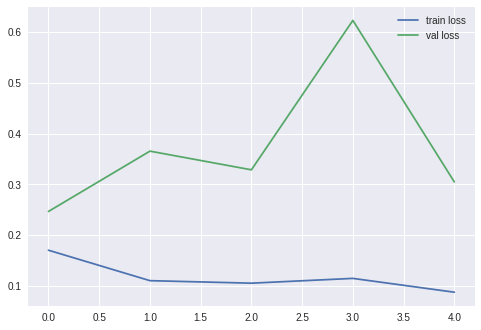

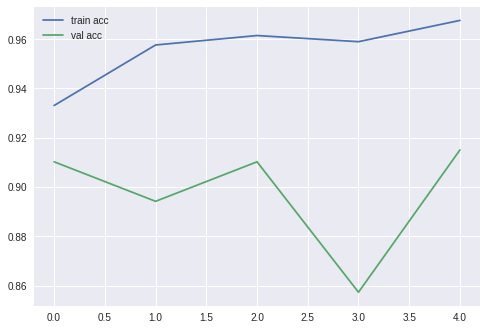

<Figure size 576x396 with 0 Axes>

In [25]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


**As We can see, We have achieved a pretty good Acuuracy score of 96.7% and Validation accuracy score of 91.5%**

**Saving the model**

In [0]:
import tensorflow as tf

from keras.models import load_model

model.save('my_first_model_vgg16.h5')

**Now. Let's Predict on some new images whether a person has Pneumonia**

**First, Let's pass a normal Xray image to our model.**

In [0]:
## Predicitng on New Data


from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('my_first_model_vgg16.h5')
img = image.load_img('/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [28]:
print(classes)

[[1.0000000e+00 3.2866872e-08]]


**As we can see here, returned array has '1' as first value and the second value is near to zero. This means that a passed image is of a person having normal xray**

**Now, Let's pass chest xray image of a person having pneumonia to see what our model predicts.**

In [29]:
## Predicitng on New Data


from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('my_first_model_vgg16.h5')
img = image.load_img('/content/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)

[[0. 1.]]


**Value at index 1 is "1". This means that person is having Pneumonia for this image.**